Notes:
The dependent variable in logistic regression follows Bernoulli Distribution


In [179]:
#Use full libraray 
import sidetable
from termcolor import colored
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy
import sklearn.model_selection
import sklearn.linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

# Data Loading and Problem Statement 

In [75]:
bank_data=pd.read_csv("bank-full.csv",sep=";")
bank_data.shape

<IPython.core.display.Javascript object>

(45211, 17)

In [76]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [77]:
print(colored("Information about data",attrs=['bold']))
print(bank_data.info())
print("\n")
print(colored("Missing Value ",attrs=['bold']))
print(bank_data.stb.missing())


Information about data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


Missing Value 
           Missing  Total  Percent
age              0 

In [78]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [79]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

All are numeric value and no data is missing 

In [80]:
bank_data.stb.freq(['y'])

,y,Count,Percent,Cumulative Count,Cumulative Percent
0,no,39922,0.883015,39922,0.883015
1,yes,5289,0.116985,45211,1.000000


In [81]:
bank_data.y=pd.get_dummies(bank_data.y)
bank_data.head()

<IPython.core.display.Javascript object>

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


totally imbalanced data so we will try oversample method 

# Making dependent variable balanced 

In [82]:
bank_data_x=bank_data.drop(columns="y")
bank_data_Y=bank_data[["y"]]


In [83]:
os =  RandomOverSampler()

In [84]:
bank_data_balance_x,bank_data_balance_y = os.fit_sample(bank_data_x,bank_data_Y)

In [85]:
bank_data_Y.y.value_counts()

1    39922
0     5289
Name: y, dtype: int64

In [86]:
bank_data_balance_y.y.value_counts()

1    39922
0    39922
Name: y, dtype: int64

In [87]:
bank_data_balnce=pd.concat([bank_data_balance_x,bank_data_balance_y],axis=1)
bank_data_balnce.shape

<IPython.core.display.Javascript object>

(79844, 17)

In [88]:
print(bank_data_balnce.job.value_counts())
print("\n")
print(bank_data_balnce.marital.value_counts())
print("\n")
print(bank_data_balnce.education.value_counts())
print("\n")
print(bank_data_balnce.default.value_counts())
print("\n")
print(bank_data_balnce.housing.value_counts())
print("\n")
print(bank_data_balnce.loan.value_counts())
print("\n")
print(bank_data_balnce.contact.value_counts())
print("\n")
print(bank_data_balnce.month.value_counts())
print("\n")
print(bank_data_balnce.poutcome.value_counts())
print("\n")

management       17866
blue-collar      14262
technician       13154
admin.            9324
services          6612
retired           5648
self-employed     2874
student           2687
unemployed        2607
entrepreneur      2327
housemaid         1975
unknown            508
Name: job, dtype: int64


married     45417
single      25209
divorced     9218
Name: marital, dtype: int64


secondary    39333
tertiary     26319
primary      10687
unknown       3505
Name: education, dtype: int64


no     78699
yes     1145
Name: default, dtype: int64


no     41932
yes    37912
Name: housing, dtype: int64


no     69533
yes    10311
Name: loan, dtype: int64


cellular     57868
unknown      16542
telephone     5434
Name: contact, dtype: int64


may    19871
jul    10951
aug    10677
jun     8953
apr     6755
nov     6584
feb     5570
oct     2883
jan     2393
sep     2213
mar     2132
dec      862
Name: month, dtype: int64


unknown    58996
failure     8992
success     7968
other       3888
Na

<IPython.core.display.Javascript object>

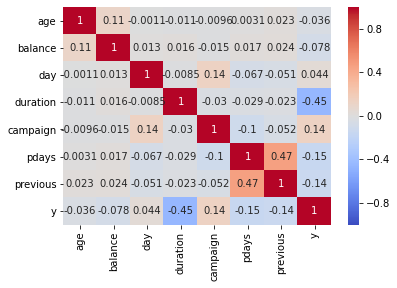

In [89]:
sns.heatmap(bank_data_balnce.corr(), vmin=-1, vmax=1, annot=True,cmap="coolwarm")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

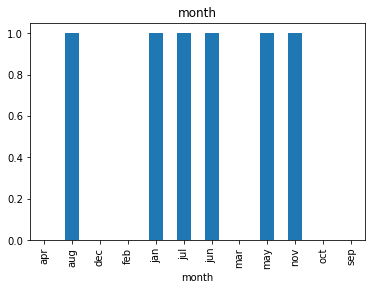

In [90]:
bank_data_balnce.groupby(bank_data_balnce.month)['y'].median().plot.bar()
plt.title("month")
plt.show()

according to that we dont need this clm 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

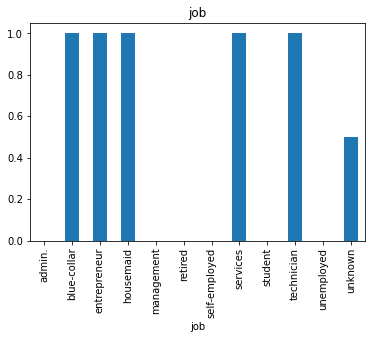

In [91]:
bank_data_balnce.groupby(bank_data_balnce.job)['y'].median().plot.bar()
plt.title("job")
plt.show()
#according to that we dont need this clm 

## remove contact(9),day(10),month(11) compaign(13),pdays(14) previous(15) poutcome(16),job


In [92]:
bank_data_balnce.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [93]:
bank_data_balnce.drop(columns={"job","contact","day","month","campaign","pdays","previous","poutcome"},inplace=True)

In [94]:
bank_data_balnce

,age,marital,education,default,balance,housing,loan,duration,y
0,58,married,tertiary,no,2143,yes,no,261,1
1,44,single,secondary,no,29,yes,no,151,1
2,33,married,secondary,no,2,yes,yes,76,1
3,47,married,unknown,no,1506,yes,no,92,1
4,33,single,unknown,no,1,no,no,198,1
...,...,...,...,...,...,...,...,...,...
79839,46,divorced,secondary,no,4329,no,no,534,0
79840,68,divorced,primary,no,250,no,no,360,0
79841,36,married,primary,no,319,yes,no,774,0
79842,50,married,secondary,no,1595,no,no,882,0


In [95]:
bank_data_balnce_marital=pd.get_dummies(bank_data_balnce.marital)


<IPython.core.display.Javascript object>

In [96]:
#feature Eng
bank_data_balnce_marital.drop(columns="single")

,divorced,married
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
79839,1,0
79840,1,0
79841,0,1
79842,0,1


In [97]:
bank_data_balnce_edu=pd.get_dummies(bank_data_balnce.education)


<IPython.core.display.Javascript object>

In [98]:
#feature Eng
bank_data_balnce_edu.drop(columns="unknown")

,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
79839,0,1,0
79840,1,0,0
79841,1,0,0
79842,0,1,0


In [99]:
bank_data_balnce.default=pd.get_dummies(bank_data_balnce.default)
bank_data_balnce

<IPython.core.display.Javascript object>

,age,marital,education,default,balance,housing,loan,duration,y
0,58,married,tertiary,1,2143,yes,no,261,1
1,44,single,secondary,1,29,yes,no,151,1
2,33,married,secondary,1,2,yes,yes,76,1
3,47,married,unknown,1,1506,yes,no,92,1
4,33,single,unknown,1,1,no,no,198,1
...,...,...,...,...,...,...,...,...,...
79839,46,divorced,secondary,1,4329,no,no,534,0
79840,68,divorced,primary,1,250,no,no,360,0
79841,36,married,primary,1,319,yes,no,774,0
79842,50,married,secondary,1,1595,no,no,882,0


In [100]:
bank_data_balnce.housing=pd.get_dummies(bank_data_balnce.housing)
bank_data_balnce

<IPython.core.display.Javascript object>

,age,marital,education,default,balance,housing,loan,duration,y
0,58,married,tertiary,1,2143,0,no,261,1
1,44,single,secondary,1,29,0,no,151,1
2,33,married,secondary,1,2,0,yes,76,1
3,47,married,unknown,1,1506,0,no,92,1
4,33,single,unknown,1,1,1,no,198,1
...,...,...,...,...,...,...,...,...,...
79839,46,divorced,secondary,1,4329,1,no,534,0
79840,68,divorced,primary,1,250,1,no,360,0
79841,36,married,primary,1,319,0,no,774,0
79842,50,married,secondary,1,1595,1,no,882,0


In [101]:
bank_data_balnce.loan=pd.get_dummies(bank_data_balnce.loan)
bank_data_balnce

<IPython.core.display.Javascript object>

,age,marital,education,default,balance,housing,loan,duration,y
0,58,married,tertiary,1,2143,0,1,261,1
1,44,single,secondary,1,29,0,1,151,1
2,33,married,secondary,1,2,0,0,76,1
3,47,married,unknown,1,1506,0,1,92,1
4,33,single,unknown,1,1,1,1,198,1
...,...,...,...,...,...,...,...,...,...
79839,46,divorced,secondary,1,4329,1,1,534,0
79840,68,divorced,primary,1,250,1,1,360,0
79841,36,married,primary,1,319,0,1,774,0
79842,50,married,secondary,1,1595,1,1,882,0


In [102]:
bank_data_balnce=bank_data_balnce.drop(columns={"marital","education"})

In [103]:
bank_data_balance_final_data=pd.concat([bank_data_balnce,bank_data_balnce_edu,bank_data_balnce_marital],axis=1)

<IPython.core.display.Javascript object>

In [104]:
bank_data_balance_final_data

,age,default,balance,housing,loan,duration,y,primary,secondary,tertiary,unknown,divorced,married,single
0,58,1,2143,0,1,261,1,0,0,1,0,0,1,0
1,44,1,29,0,1,151,1,0,1,0,0,0,0,1
2,33,1,2,0,0,76,1,0,1,0,0,0,1,0
3,47,1,1506,0,1,92,1,0,0,0,1,0,1,0
4,33,1,1,1,1,198,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,46,1,4329,1,1,534,0,0,1,0,0,1,0,0
79840,68,1,250,1,1,360,0,1,0,0,0,1,0,0
79841,36,1,319,0,1,774,0,1,0,0,0,0,1,0
79842,50,1,1595,1,1,882,0,0,1,0,0,0,1,0


<IPython.core.display.Javascript object>

C:\Users\Sanchi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stats=0.9504802823066711, p=0.0
SKEW=0.8224522024042514
KURT=0.5035314353418006


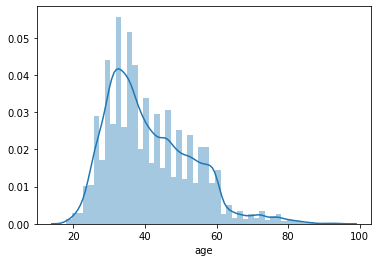

In [105]:
sns.distplot(bank_data_balance_final_data.age)
stat, p=scipy.stats.shapiro(bank_data_balance_final_data.age)
print("stats={}, p={}".format(stat,p))
# Null Rejected data is not normal distributed bcz p is less  than 0.05
print("SKEW={}".format(bank_data_balance_final_data.age.skew()))
print("KURT={}".format(bank_data_balance_final_data.age.kurt()))

<IPython.core.display.Javascript object>

C:\Users\Sanchi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stats=0.47029823064804077, p=0.0
SKEW=8.344483801656688
KURT=137.87676526997745


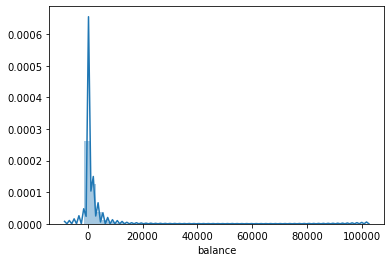

In [106]:
sns.distplot(bank_data_balance_final_data.balance)
stat, p=scipy.stats.shapiro(bank_data_balance_final_data.balance)
print("stats={}, p={}".format(stat,p))
# Null Rejected data is not normal distributed bcz p is less  than 0.05
print("SKEW={}".format(bank_data_balance_final_data.balance.skew()))
print("KURT={}".format(bank_data_balance_final_data.balance.kurt()))

<IPython.core.display.Javascript object>

C:\Users\Sanchi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stats=0.8009781837463379, p=0.0
SKEW=2.154316980675116
KURT=7.4219814749091695


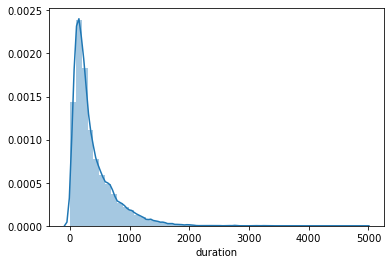

In [107]:
sns.distplot(bank_data_balance_final_data.duration)
stat, p=scipy.stats.shapiro(bank_data_balance_final_data.duration)
print("stats={}, p={}".format(stat,p))
# Null Rejected data is not normal distributed bcz p is less  than 0.05
print("SKEW={}".format(bank_data_balance_final_data.duration.skew()))
print("KURT={}".format(bank_data_balance_final_data.duration.kurt()))

# standarization

In [167]:
scaler = StandardScaler()

In [169]:
print(scaler.fit(bank_data_balance_final_data[["age","balance","duration"]]))

StandardScaler()


In [ ]:
bank_data_balance_final_data[["age","balance","duration"]]=scaler.transform(bank_data_balance_final_data[["age","balance","duration"]])

In [171]:
# from here we know data needs to be transform 
x=bank_data_balance_final_data.drop(columns="y")
y=bank_data_balance_final_data[["y"]]

,y
0,1
1,1
2,1
3,1
4,1
...,...
79839,0
79840,0
79841,0
79842,0


In [203]:
xtrain,xtest,ytrain,ytest=sklearn.model_selection.train_test_split(x,y,test_size=.20,random_state=3)

In [204]:
model1=sklearn.linear_model.LogisticRegression()

In [205]:
model1.fit(xtrain,ytrain.y.ravel())

LogisticRegression()

In [206]:
predict_train=model1.predict(xtrain)

In [207]:
accuracy_score(ytrain,predict_train)

0.7742778864970645

In [208]:
predict_test=model1.predict(xtest)

In [209]:
accuracy_score(ytest,predict_test)

0.7725593337090613

In [210]:
confusion_matrix(ytest,predict_test)

array([[5959, 2020],
       [1612, 6378]], dtype=int64)

In [221]:
classification_report(ytest,predict_test)

'              precision    recall  f1-score   support\n\n           0       0.79      0.75      0.77      7979\n           1       0.76      0.80      0.78      7990\n\n    accuracy                           0.77     15969\n   macro avg       0.77      0.77      0.77     15969\nweighted avg       0.77      0.77      0.77     15969\n'

In [239]:
score=sklearn.model_selection.cross_val_score(model1,x,y.y.ravel(),cv=4)
score

array([0.77851811, 0.76559291, 0.74530334, 0.76619408])

In [240]:
score.mean()

0.7639021091127699

In [241]:
# check multicolinearity 

In [242]:
#by corr there is no multi